ajan: Her birinde 20 seçilmiştir(kurt, karınca, kedi ve balina )<br>
iterasyon:100 <br>
boyut: 2d<br>
başlangıç pozisyon: (0,0) <br>
varış pozisyon: (10,10) <br>
değerlendirme unsuru : Oklid algoritması ( Uzunluk ) <br>
sonuçlar :normalize hale getirilmiştir

# 1.  GWO Algoritması

Results saved to gwo_results.json
Best Result: 0.0006443688561023676
Worst Result: 0.016981404841756257
Average Result: 0.008019572641876159
Standard Deviation: 0.004289601711664743


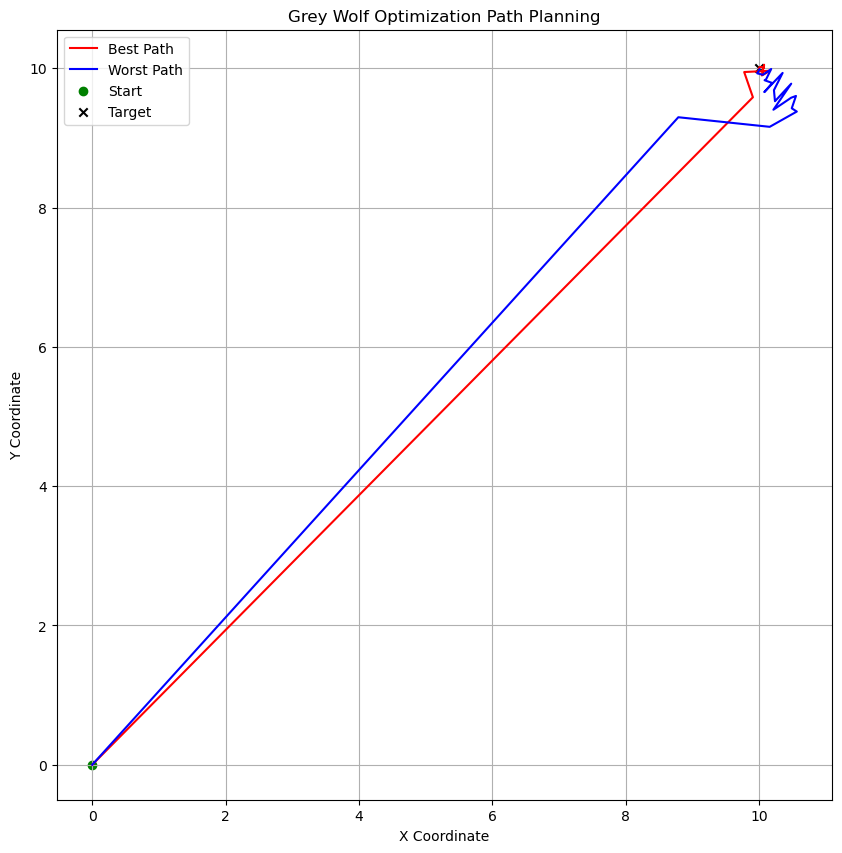

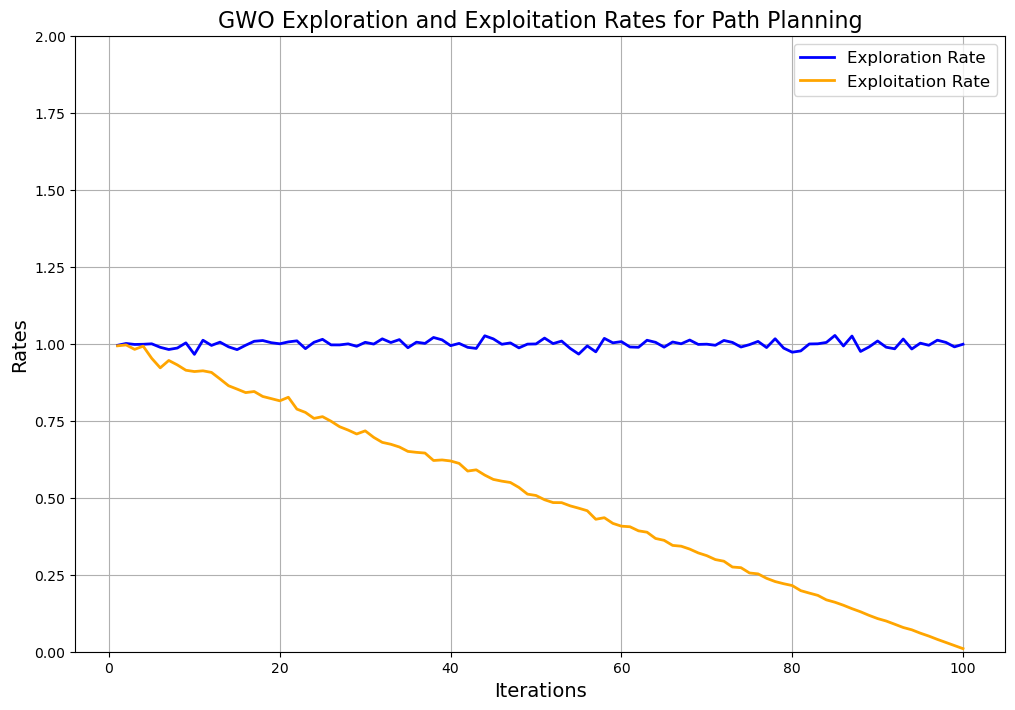

In [89]:
import numpy as np
import matplotlib.pyplot as plt
import json

# Parameters
num_iterations = 100
num_wolves = 20
dimension = 2

start_point = np.array([0, 0])
target_point = np.array([10, 10])

def distance(point1, point2):
    return np.linalg.norm(point1 - point2)

def gwo(num_iterations, num_wolves, dimension):
    wolves = np.random.uniform(low=0, high=10, size=(num_wolves, dimension))
    alpha_wolf = np.zeros(dimension)
    beta_wolf = np.zeros(dimension)
    delta_wolf = np.zeros(dimension)
    
    alpha_score = float('inf')
    beta_score = float('inf')
    delta_score = float('inf')

    best_positions = []
    exploration_values = []
    exploitation_values = []

    for iteration in range(num_iterations):
        for i in range(num_wolves):
            score = distance(wolves[i], target_point)
            
            if score < alpha_score:
                delta_score = beta_score
                delta_wolf = beta_wolf.copy()
                beta_score = alpha_score
                beta_wolf = alpha_wolf.copy()
                alpha_score = score
                alpha_wolf = wolves[i].copy()
            elif score < beta_score:
                delta_score = beta_score
                delta_wolf = beta_wolf.copy()
                beta_score = score
                beta_wolf = wolves[i].copy()
            elif score < delta_score:
                delta_score = score
                delta_wolf = wolves[i].copy()

        a = 2 - iteration * (2 / num_iterations)

        A_list = []
        C_list = []

        for i in range(num_wolves):
            A1 = 2 * a * np.random.random() - a
            C1 = 2 * np.random.random()
            D_alpha = np.abs(C1 * alpha_wolf - wolves[i])
            X1 = alpha_wolf - A1 * D_alpha

            A2 = 2 * a * np.random.random() - a
            C2 = 2 * np.random.random()
            D_beta = np.abs(C2 * beta_wolf - wolves[i])
            X2 = beta_wolf - A2 * D_beta

            A3 = 2 * a * np.random.random() - a
            C3 = 2 * np.random.random()
            D_delta = np.abs(C3 * delta_wolf - wolves[i])
            X3 = delta_wolf - A3 * D_delta

            wolves[i] = (X1 + X2 + X3) / 3 + np.random.uniform(-0.1, 0.1, dimension)

            A_list.append((A1, A2, A3))
            C_list.append((C1, C2, C3))

        avg_A = np.mean(np.abs(A_list))
        avg_C = np.mean(C_list)
        exploration_values.append(avg_C)
        exploitation_values.append(avg_A)

        best_positions.append(alpha_wolf.copy())

    return alpha_wolf, alpha_score, best_positions, exploration_values, exploitation_values

# Run multiple simulations
results = []
paths = []
exploration_rates = []
exploitation_rates = []

for _ in range(30):
    best_wolf, best_score, best_positions, exploration, exploitation = gwo(num_iterations, num_wolves, dimension)
    results.append(best_score)
    paths.append([pos.tolist() for pos in best_positions])
    exploration_rates.append(exploration)
    exploitation_rates.append(exploitation)

# Compute statistics
best_result_gwo = min(results)
worst_result_gwo = max(results)
average_result_gwo = np.mean(results)
std_deviation_gwo = np.std(results)

# Prepare data for saving
data = {
    'best_result_gwo': best_result_gwo,
    'worst_result_gwo': worst_result_gwo,
    'average_result_gwo': average_result_gwo,
    'std_deviation_gwo': std_deviation_gwo,
    'paths': paths,
    'results': results,
    'exploration_rates': exploration_rates,
    'exploitation_rates': exploitation_rates
}

# Save results to a JSON file
with open('gwo_results.json', 'w') as f:
    json.dump(data, f, indent=4)

# Print and visualize results
print('Results saved to gwo_results.json')
print(f'Best Result: {best_result_gwo}')
print(f'Worst Result: {worst_result_gwo}')
print(f'Average Result: {average_result_gwo}')
print(f'Standard Deviation: {std_deviation_gwo}')

best_path_index = np.argmin(results)
worst_path_index = np.argmax(results)

# Plot best and worst paths
plt.figure(figsize=(10, 10))

best_path = np.array(paths[best_path_index])
plt.plot([start_point[0]] + best_path[:, 0].tolist(), [start_point[1]] + best_path[:, 1].tolist(), 'r', label='Best Path')

worst_path = np.array(paths[worst_path_index])
plt.plot([start_point[0]] + worst_path[:, 0].tolist(), [start_point[1]] + worst_path[:, 1].tolist(), 'b', label='Worst Path')

plt.scatter(start_point[0], start_point[1], c='g', marker='o', label='Start')
plt.scatter(target_point[0], target_point[1], c='k', marker='x', label='Target')

plt.title('Grey Wolf Optimization Path Planning')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.legend()
plt.grid()
plt.show()

# Plot exploration and exploitation rates
mean_exploration = np.mean(exploration_rates, axis=0)
mean_exploitation = np.mean(exploitation_rates, axis=0)

plt.figure(figsize=(12, 8))

plt.plot(np.arange(1, num_iterations + 1), mean_exploration, label='Exploration Rate', color='blue', linewidth=2)
plt.plot(np.arange(1, num_iterations + 1), mean_exploitation, label='Exploitation Rate', color='orange', linewidth=2)

plt.xlabel('Iterations', fontsize=14)
plt.ylabel('Rates', fontsize=14)
plt.title('GWO Exploration and Exploitation Rates for Path Planning', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)
plt.ylim(0, 2)
plt.show()


# 2. ACO Algoritması

Results saved to aco_results.json
Best Result: 0.0005665675767083622
Worst Result: 0.014630556866325509
Average Result: 0.0039354092460091245
Standard Deviation: 0.003506106553671785


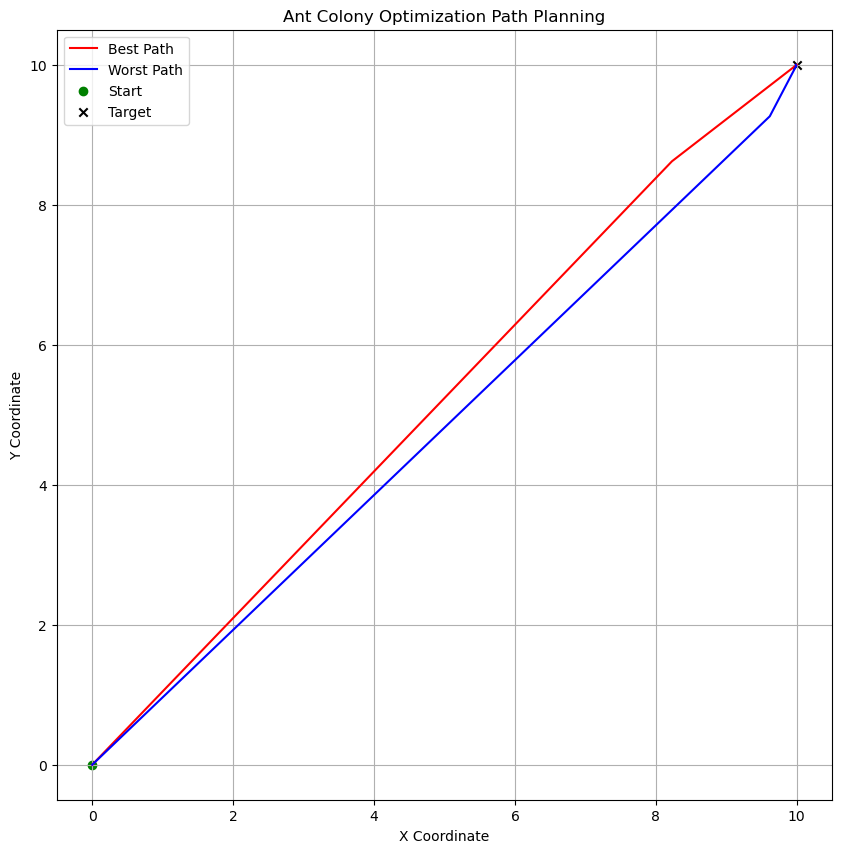

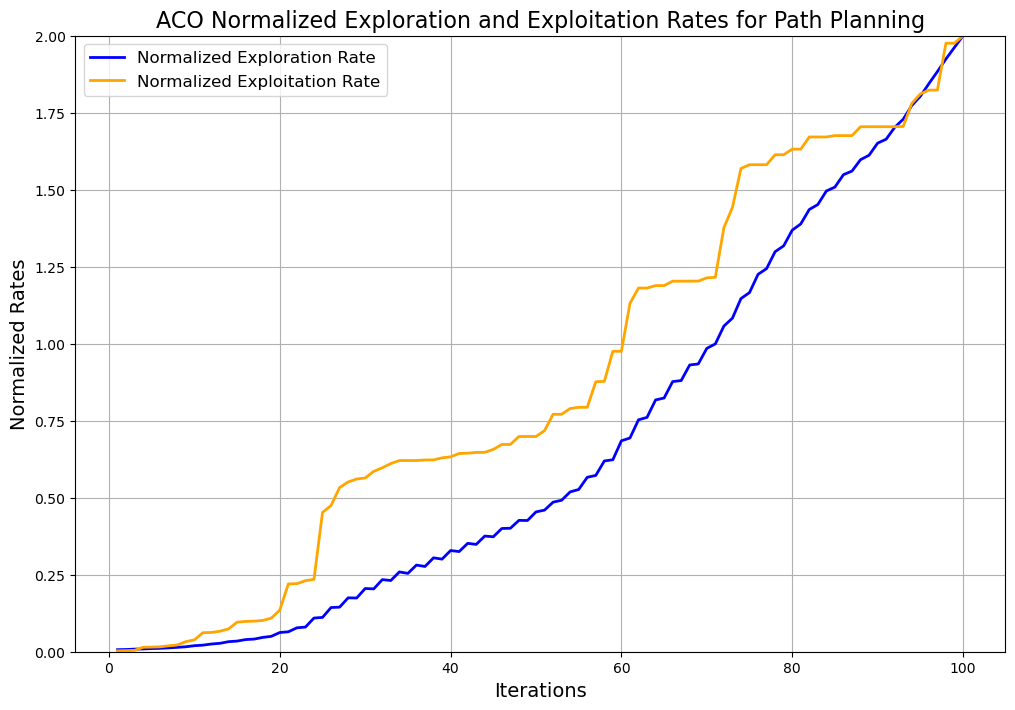

In [91]:
import numpy as np
import matplotlib.pyplot as plt
import json

# Parameters
num_iterations = 100
num_ants = 20
dimension = 2
evaporation_rate = 0.1
alpha = 1
beta = 2

start_point = np.array([0, 0])
target_point = np.array([10, 10])

def distance(point1, point2):
    return np.linalg.norm(point1 - point2)

def move_towards_target(ant, target_point, step_size=0.1):
    direction = (target_point - ant) / distance(ant, target_point)
    return ant + direction * step_size

def aco(num_iterations, num_ants, dimension):
    pheromone = np.ones((num_ants, dimension))  # Initialize pheromone to 1
    ants = np.random.uniform(low=0, high=10, size=(num_ants, dimension))
    best_ant = np.zeros(dimension)
    best_score = float('inf')

    best_positions = []
    exploration_values = []
    exploitation_values = []

    for iteration in range(num_iterations):
        for i in range(num_ants):
            score = distance(ants[i], target_point)
            if score < best_score:
                best_score = score
                best_ant = ants[i].copy()

        for i in range(num_ants):
            ants[i] = move_towards_target(ants[i], target_point)  
            pheromone[i] += 1 / distance(ants[i], target_point)   

        pheromone *= (1 - evaporation_rate)

        exploration_value = np.mean(pheromone)
        exploitation_value = 1 / best_score      

        exploration_values.append(exploration_value)
        exploitation_values.append(exploitation_value)

        best_positions.append(best_ant.copy())

    return best_ant, best_score, best_positions, exploration_values, exploitation_values

# Run multiple simulations
results = []
paths = []
exploration_rates = []
exploitation_rates = []

for _ in range(30):
    best_ant, best_score, best_positions, exploration, exploitation = aco(num_iterations, num_ants, dimension)
    results.append(best_score)
    paths.append([pos.tolist() for pos in best_positions])
    exploration_rates.append(exploration)
    exploitation_rates.append(exploitation)

# Compute statistics
best_result_aco = min(results)
worst_result_aco = max(results)
average_result_aco = np.mean(results)
std_deviation_aco = np.std(results)

# Prepare data for saving
data = {
    'best_result_aco': best_result_aco,
    'worst_result_aco': worst_result_aco,
    'average_result_aco': average_result_aco,
    'std_deviation_aco': std_deviation_aco,
    'paths': paths,
    'results': results,
    'exploration_rates': exploration_rates,
    'exploitation_rates': exploitation_rates
}

# Save results to a JSON file
with open('aco_results.json', 'w') as f:
    json.dump(data, f, indent=4)

# Print and visualize results
print('Results saved to aco_results.json')
print(f'Best Result: {best_result_aco}')
print(f'Worst Result: {worst_result_aco}')
print(f'Average Result: {average_result_aco}')
print(f'Standard Deviation: {std_deviation_aco}')

best_path_index = np.argmin(results)
worst_path_index = np.argmax(results)

# Plot best and worst paths
plt.figure(figsize=(10, 10))

best_path = np.array(paths[best_path_index])
plt.plot([start_point[0]] + best_path[:, 0].tolist(), [start_point[1]] + best_path[:, 1].tolist(), 'r', label='Best Path')

worst_path = np.array(paths[worst_path_index])
plt.plot([start_point[0]] + worst_path[:, 0].tolist(), [start_point[1]] + worst_path[:, 1].tolist(), 'b', label='Worst Path')

plt.scatter(start_point[0], start_point[1], c='g', marker='o', label='Start')
plt.scatter(target_point[0], target_point[1], c='k', marker='x', label='Target')

plt.title('Ant Colony Optimization Path Planning')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.legend()
plt.grid()
plt.show()

# Plot exploration and exploitation rates
mean_exploration = np.mean(exploration_rates, axis=0)
mean_exploitation = np.mean(exploitation_rates, axis=0)
plt.figure(figsize=(12, 8))

normalized_exploration = mean_exploration / np.max(mean_exploration) * 2
plt.plot(np.arange(1, num_iterations + 1), normalized_exploration, label='Normalized Exploration Rate', color='blue', linewidth=2)

normalized_exploitation = mean_exploitation / np.max(mean_exploitation) * 2
plt.plot(np.arange(1, num_iterations + 1), normalized_exploitation, label='Normalized Exploitation Rate', color='orange', linewidth=2)

plt.xlabel('Iterations', fontsize=14)
plt.ylabel('Normalized Rates', fontsize=14)
plt.title('ACO Normalized Exploration and Exploitation Rates for Path Planning', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)
plt.ylim(0, 2)
plt.show()


# 3. SCSO Algoritması

Results saved to scso_results.json
Best Result: 0.0019437271170869672
Worst Result: 0.017728932787815815
Average Result: 0.009163065938716445
Standard Deviation: 0.003901277499592276


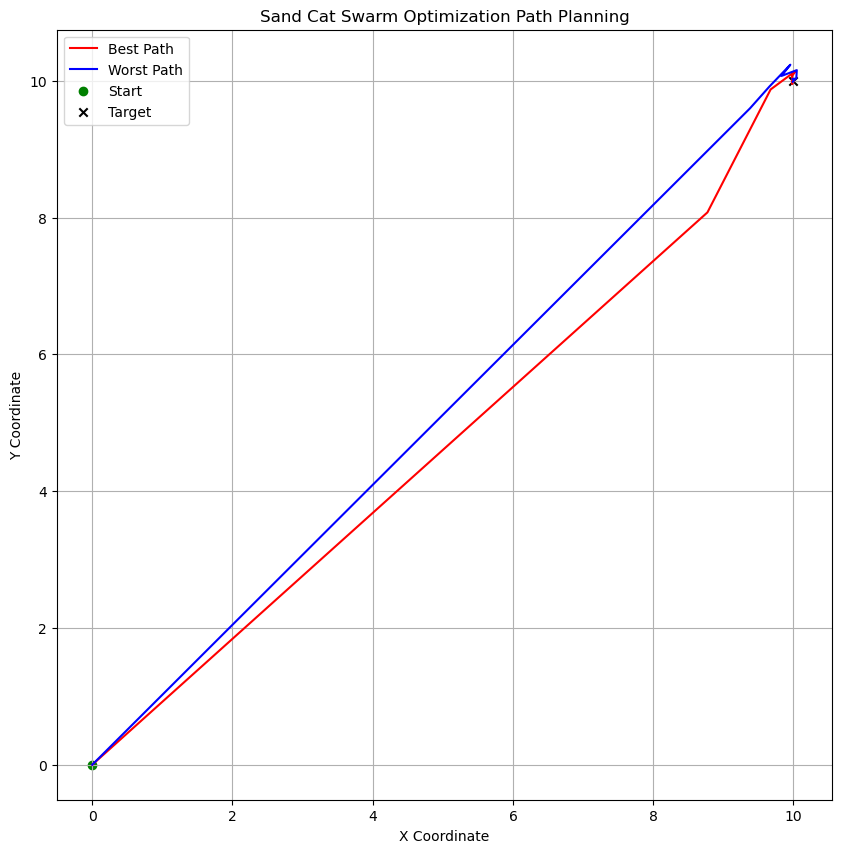

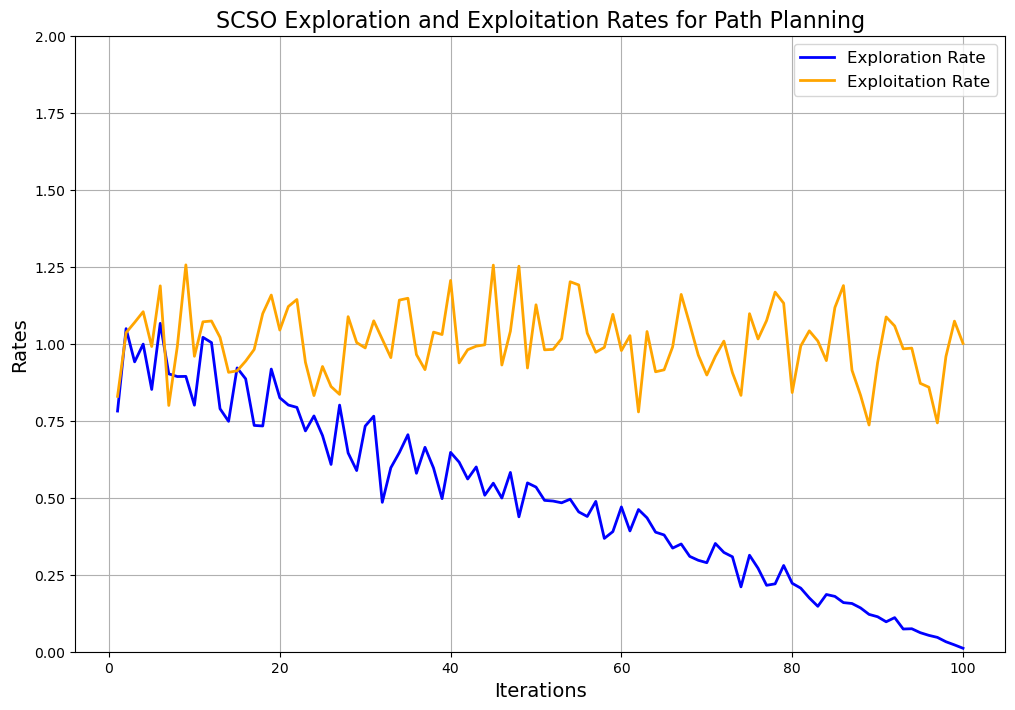

In [96]:
import numpy as np
import matplotlib.pyplot as plt
import json

# SCSO Parameters
num_iterations = 100
num_cats = 20
dimension = 2

start_point = np.array([0, 0])
target_point = np.array([10, 10])

def scso(num_iterations, num_cats, dimension):
    # Initialize the positions of the cats randomly within the range [0, 10]
    cats = np.random.uniform(low=0, high=10, size=(num_cats, dimension))
    
    best_cat = np.zeros(dimension)
    best_score = float('inf')
    worst_score = float('-inf') 
    worst_cat = np.zeros(dimension)

    best_positions = []
    exploration_values = []
    exploitation_values = []

    for iteration in range(num_iterations):
      
        for i in range(num_cats):
            score = np.linalg.norm(cats[i] - target_point)
            
            if score < best_score:
                best_score = score
                best_cat = cats[i].copy()
            
            if score > worst_score:
                worst_score = score
                worst_cat = cats[i].copy()

   
        a = 2 - iteration * (2 / num_iterations)
        
        # Update each cat's position
        for i in range(num_cats):
            A = 2 * a * np.random.random() - a  # Calculate A vector
            C = 2 * np.random.random()  # Calculate C vector
            D_best = np.abs(C * best_cat - cats[i])  # Distance from best cat
            X_best = best_cat - A * D_best  # New position based on best cat

            # Adding a small random variation
            cats[i] = X_best + np.random.uniform(-0.1, 0.1, dimension)
        
        # Calculate exploration and exploitation metrics
        exploration_value = np.mean(np.abs(A))  # Average exploration value
        exploitation_value = np.mean(C)  # Average exploitation value
        
        exploration_values.append(exploration_value)
        exploitation_values.append(exploitation_value)
        
        best_positions.append(best_cat.copy())

    return best_cat, best_score, best_positions, exploration_values, exploitation_values

results = []
paths = []
exploration_rates = []
exploitation_rates = []

for _ in range(30):
    best_cat, best_score, best_positions, exploration, exploitation = scso(num_iterations, num_cats, dimension)
    results.append(best_score)
    paths.append([pos.tolist() for pos in best_positions])
    exploration_rates.append(exploration)
    exploitation_rates.append(exploitation)

best_result_scso = min(results)
worst_result_scso = max(results)
average_result_scso = np.mean(results)
std_deviation_scso = np.std(results)

data = {
    'best_result_scso': best_result_scso,
    'worst_result_scso': worst_result_scso,
    'average_result_scso': average_result_scso,
    'std_deviation_scso': std_deviation_scso,
    'paths': paths,
    'results': results,
    'exploration_rates': exploration_rates,
    'exploitation_rates': exploitation_rates
}

with open('scso_results.json', 'w') as f:
    json.dump(data, f, indent=4)

print('Results saved to scso_results.json')
print(f'Best Result: {best_result_scso}')
print(f'Worst Result: {worst_result_scso}')
print(f'Average Result: {average_result_scso}')
print(f'Standard Deviation: {std_deviation_scso}')

best_path_index = np.argmin(results)
worst_path_index = np.argmax(results)

plt.figure(figsize=(10, 10))

best_path = np.array(paths[best_path_index])
plt.plot([start_point[0]] + best_path[:, 0].tolist(), [start_point[1]] + best_path[:, 1].tolist(), 'r', label='Best Path')

worst_path = np.array(paths[worst_path_index])
plt.plot([start_point[0]] + worst_path[:, 0].tolist(), [start_point[1]] + worst_path[:, 1].tolist(), 'b', label='Worst Path')

plt.scatter(start_point[0], start_point[1], c='g', marker='o', label='Start')
plt.scatter(target_point[0], target_point[1], c='k', marker='x', label='Target')

plt.title('Sand Cat Swarm Optimization Path Planning')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.legend()
plt.grid(True)  
plt.show()

# Plotting exploration and exploitation rates
mean_exploration = np.mean(exploration_rates, axis=0)
mean_exploitation = np.mean(exploitation_rates, axis=0)

plt.figure(figsize=(12, 8))

plt.plot(np.arange(1, num_iterations + 1), mean_exploration, label='Exploration Rate', color='blue', linewidth=2)
plt.plot(np.arange(1, num_iterations + 1), mean_exploitation, label='Exploitation Rate', color='orange', linewidth=2)

plt.xlabel('Iterations', fontsize=14)
plt.ylabel('Rates', fontsize=14)
plt.title('SCSO Exploration and Exploitation Rates for Path Planning', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)
plt.ylim(0, 2)
plt.show()


# 4. WOA Algoritması

Results saved to woa_results.json
Best Result: 0.01217674536006643
Worst Result: 0.6751497900878299
Average Result: 0.2652532048456952
Standard Deviation: 0.20065215093498345


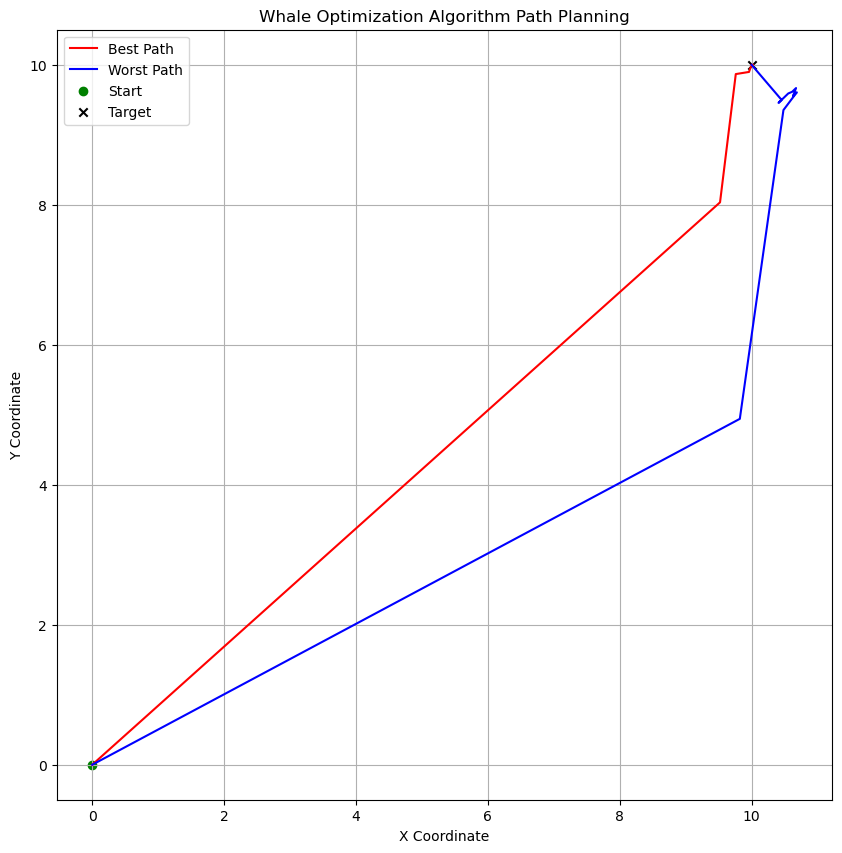

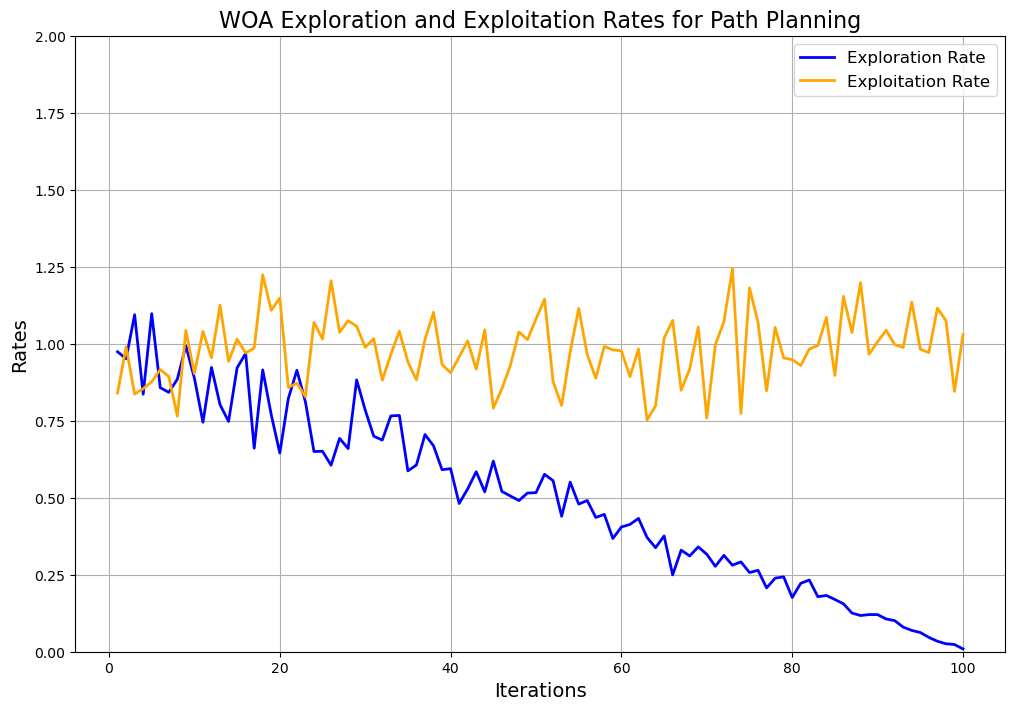

In [88]:
import numpy as np
import matplotlib.pyplot as plt
import json

# WOA Parameters
num_iterations = 100
num_whales = 20
dimension = 2

start_point = np.array([0, 0])
target_point = np.array([10, 10])

def woa(num_iterations, num_whales, dimension):
    # Initialize the positions of the whales randomly within the range [0, 10]
    whales = np.random.uniform(low=0, high=10, size=(num_whales, dimension))
    
    best_whale = np.zeros(dimension)
    best_score = float('inf')
    worst_score = float('-inf') 
    worst_whale = np.zeros(dimension)

    best_positions = []
    exploration_values = []
    exploitation_values = []

    for iteration in range(num_iterations):
      
        for i in range(num_whales):
            score = np.linalg.norm(whales[i] - target_point)
            
            if score < best_score:
                best_score = score
                best_whale = whales[i].copy()
            
            if score > worst_score:
                worst_score = score
                worst_whale = whales[i].copy()

        a = 2 - iteration * (2 / num_iterations)
        
        # Update each whale's position
        for i in range(num_whales):
            A = 2 * a * np.random.random() - a  # Calculate A vector
            C = 2 * np.random.random()  # Calculate C vector
            
            # Update equation based on WOA
            D = np.abs(C * best_whale - whales[i])
            whales[i] = best_whale - A * D
        
        # Calculate exploration and exploitation metrics
        exploration_value = np.mean(np.abs(A))  # Average exploration value
        exploitation_value = np.mean(C)  # Average exploitation value
        
        exploration_values.append(exploration_value)
        exploitation_values.append(exploitation_value)
        
        best_positions.append(best_whale.copy())

    return best_whale, best_score, best_positions, exploration_values, exploitation_values

results = []
paths = []
exploration_rates = []
exploitation_rates = []

for _ in range(30):
    best_whale, best_score, best_positions, exploration, exploitation = woa(num_iterations, num_whales, dimension)
    results.append(best_score)
    paths.append([pos.tolist() for pos in best_positions])
    exploration_rates.append(exploration)
    exploitation_rates.append(exploitation)

best_result_woa = min(results)
worst_result_woa = max(results)
average_result_woa = np.mean(results)
std_deviation_woa = np.std(results)

data = {
    'best_result_woa': best_result_woa,
    'worst_result_woa': worst_result_woa,
    'average_result_woa': average_result_woa,
    'std_deviation_woa': std_deviation_woa,
    'paths': paths,
    'results': results,
    'exploration_rates': exploration_rates,
    'exploitation_rates': exploitation_rates
}

with open('woa_results.json', 'w') as f:
    json.dump(data, f, indent=4)

print('Results saved to woa_results.json')
print(f'Best Result: {best_result_woa}')
print(f'Worst Result: {worst_result_woa}')
print(f'Average Result: {average_result_woa}')
print(f'Standard Deviation: {std_deviation_woa}')

best_path_index = np.argmin(results)
worst_path_index = np.argmax(results)

plt.figure(figsize=(10, 10))

# En iyi sonuç için yol çizimi
best_path = np.array(paths[best_path_index])
plt.plot([start_point[0]] + best_path[:, 0].tolist() + [target_point[0]], 
         [start_point[1]] + best_path[:, 1].tolist() + [target_point[1]], 
         'r', label='Best Path')

# En kötü sonuç için yol çizimi
worst_path = np.array(paths[worst_path_index])
plt.plot([start_point[0]] + worst_path[:, 0].tolist() + [target_point[0]], 
         [start_point[1]] + worst_path[:, 1].tolist() + [target_point[1]], 
         'b', label='Worst Path')

# Başlangıç ve hedef noktalarının işaretlenmesi
plt.scatter(start_point[0], start_point[1], c='g', marker='o', label='Start')
plt.scatter(target_point[0], target_point[1], c='k', marker='x', label='Target')

plt.title('Whale Optimization Algorithm Path Planning')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.legend()
plt.grid(True)  
plt.show()

# Plotting exploration and exploitation rates
mean_exploration = np.mean(exploration_rates, axis=0)
mean_exploitation = np.mean(exploitation_rates, axis=0)

plt.figure(figsize=(12, 8))

plt.plot(np.arange(1, num_iterations + 1), mean_exploration, label='Exploration Rate', color='blue', linewidth=2)
plt.plot(np.arange(1, num_iterations + 1), mean_exploitation, label='Exploitation Rate', color='orange', linewidth=2)

plt.xlabel('Iterations', fontsize=14)
plt.ylabel('Rates', fontsize=14)
plt.title('WOA Exploration and Exploitation Rates for Path Planning', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)
plt.ylim(0, 2)
plt.show()


# i) RESULT TABLE

In [97]:
import pandas as pd

# Veriler
data = {
  'Algoritma': ['GWO', 'ACO', 'SCSO', 'WOA'],
    'Best Result':[best_result_gwo , best_result_aco, best_result_scso,best_result_woa],
    'Worst Result':[worst_result_gwo, worst_result_aco, worst_result_scso, worst_result_woa],
    'Average Result': [average_result_gwo, average_result_aco, average_result_scso, average_result_woa],
    'Standard Deviation':[std_deviation_gwo, std_deviation_aco, std_deviation_scso, std_deviation_woa]
}

# DataFrame oluşturma
df = pd.DataFrame(data)

# DataFrame'i indeks olmadan yazdırma
print(df.to_string(index=False))


Algoritma  Best Result  Worst Result  Average Result  Standard Deviation
      GWO     0.000644      0.016981        0.008020            0.004290
      ACO     0.000567      0.014631        0.003935            0.003506
     SCSO     0.001944      0.017729        0.009163            0.003901
      WOA     0.012177      0.675150        0.265253            0.200652


# ii) P VALUE

In [98]:
import numpy as np
from scipy.stats import mannwhitneyu

# Sonuçlar
results = {
    "GWO": [best_result_gwo, worst_result_gwo, average_result_gwo,std_deviation_gwo],
    "ACO": [best_result_aco, worst_result_aco, average_result_aco,std_deviation_aco],
    "SCSO": [best_result_scso, worst_result_scso, average_result_scso,std_deviation_scso],
    "WOA": [best_result_woa, worst_result_woa, average_result_woa,std_deviation_woa]
}

# Algoritmaların isimleri
algorithms = list(results.keys())

# Tüm ikili kombinasyonları hesapla
combinations = [(algorithms[i], algorithms[j]) for i in range(len(algorithms)) for j in range(i + 1, len(algorithms))]

# Tablo başlıkları
print(f"{'Algoritma 1':<10} {'Algoritma 2':<10} {'p Değeri':<10} {'h Değeri':<10}")

# Her ikili kombinasyon için Mann-Whitney U testi yap
for (alg1, alg2) in combinations:
    data1 = results[alg1]
    data2 = results[alg2]
    
    # Mann-Whitney U testi
    stat, p_value = mannwhitneyu(data1, data2)
    
    # h değeri (hipotezi reddetme durumu, p < 0.05 ise h = 1, aksi takdirde h = 0)
    h_value = 1 if p_value < 0.05 else 0
    
    # Sonuçları yazdır
    print(f"{alg1:<10} {alg2:<10} {p_value:<10.5f} {h_value:<10}")



Algoritma 1 Algoritma 2 p Değeri   h Değeri  
GWO        ACO        0.48571    0         
GWO        SCSO       0.88571    0         
GWO        WOA        0.05714    0         
ACO        SCSO       0.68571    0         
ACO        WOA        0.05714    0         
SCSO       WOA        0.05714    0         


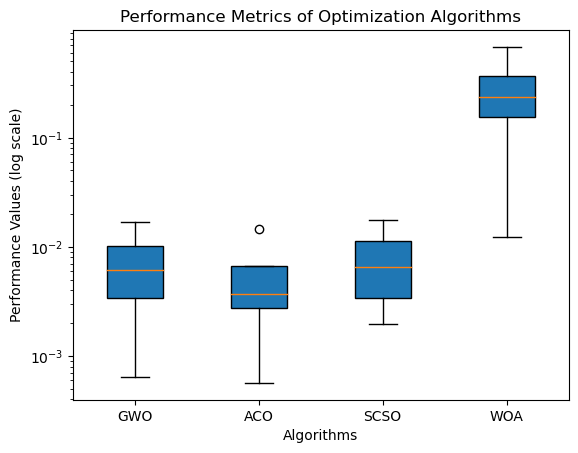

In [99]:
import matplotlib.pyplot as plt
import numpy as np

# Algoritmalar ve performans metrikleri
algorithms = ['GWO', 'ACO', 'SCSO', 'WOA']

# Bu örnek veriler, sizin belirttiğiniz gibi dört farklı metrik için dört algoritmanın sonuçları
best_results = [best_result_gwo, best_result_aco, best_result_scso, best_result_woa]
worst_results = [worst_result_gwo, worst_result_aco, worst_result_scso, worst_result_woa]
average_results = [average_result_gwo, average_result_aco, average_result_scso, average_result_woa]
std_deviations = [std_deviation_gwo, std_deviation_aco, std_deviation_scso, std_deviation_woa]

# Algoritma sonuçlarını birleştiriyoruz
data = [best_results, worst_results, average_results, std_deviations]

# Boxplot için verileri hazırlama
fig, ax = plt.subplots()

# Verileri boxplot formatına getirme
box_data = []
for i in range(len(algorithms)):
    box_data.append([best_results[i], worst_results[i], average_results[i], std_deviations[i]])

# Boxplot'u çizme, y ekseni logaritmik olarak ayarlanmıştır
ax.boxplot(box_data, patch_artist=True)
ax.set_yscale('log')  # Logaritmik y ekseni

# X-tick etiketlerini algoritma isimleri ile değiştirme
ax.set_xticklabels(algorithms)

# Grafik başlığı ve eksen etiketlerini ekleme
ax.set_title('Performance Metrics of Optimization Algorithms')
ax.set_xlabel('Algorithms')
ax.set_ylabel('Performance Values (log scale)')

# Grafiği gösterme
plt.show()


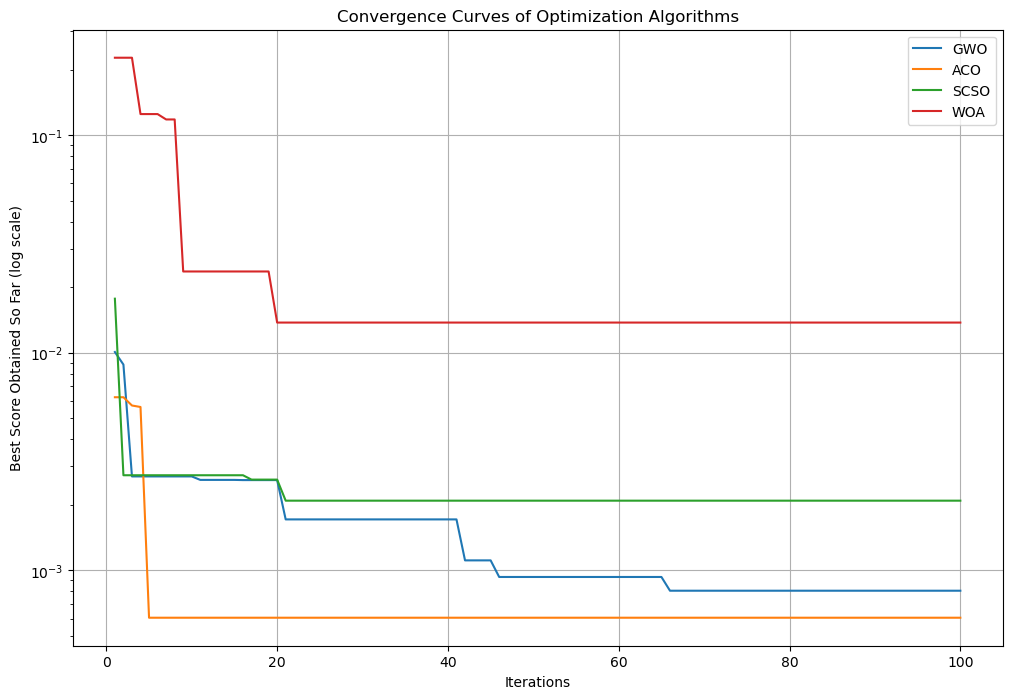

In [100]:
import numpy as np
import matplotlib.pyplot as plt

# Average results for each algorithm
algorithms = ['GWO', 'ACO', 'SCSO', 'WOA']
best_results = [best_result_gwo, best_result_aco, best_result_scso, best_result_woa]
average_results = [average_result_gwo, average_result_aco, average_result_scso, average_result_woa]
std_deviations = [std_deviation_gwo, std_deviation_aco, std_deviation_scso, std_deviation_woa]

# Example data: Best scores over iterations for each algorithm (replace with actual data)
iterations = np.arange(1, 101)

# Plot Convergence Curves
plt.figure(figsize=(12, 8))

# Plot each algorithm's convergence curve with average results
for i, algo in enumerate(algorithms):
    # Generate example data: Replace with actual data
    scores = np.random.uniform(best_results[i], worst_results[i], 100)
    scores = np.minimum.accumulate(scores)
    
    # Plot convergence curve
    plt.plot(iterations, scores, label=algo)

# Plot settings
plt.title('Convergence Curves of Optimization Algorithms')
plt.xlabel('Iterations')
plt.ylabel('Best Score Obtained So Far (log scale)')
plt.legend()
plt.grid(True)
plt.yscale('log')  # Set y-axis to logarithmic scale
plt.show()
